# 20231382 - ML ICW

## Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

## Load data

In [4]:
raw_data = pd.read_csv('/content/drive/MyDrive/20231382/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
raw_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Exploratory Data Analysis

In [7]:
df = raw_data.copy()

In [8]:
df.shape

(7043, 21)

In [9]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.duplicated().sum()

np.int64(0)

Change the data type of Total Chargers to numeric

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Dropping unnecessary variables

In [14]:
df = df.drop(columns = ['customerID'])

### Plotting the independent variables against target

In [15]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Exploring categorical variables

In [16]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

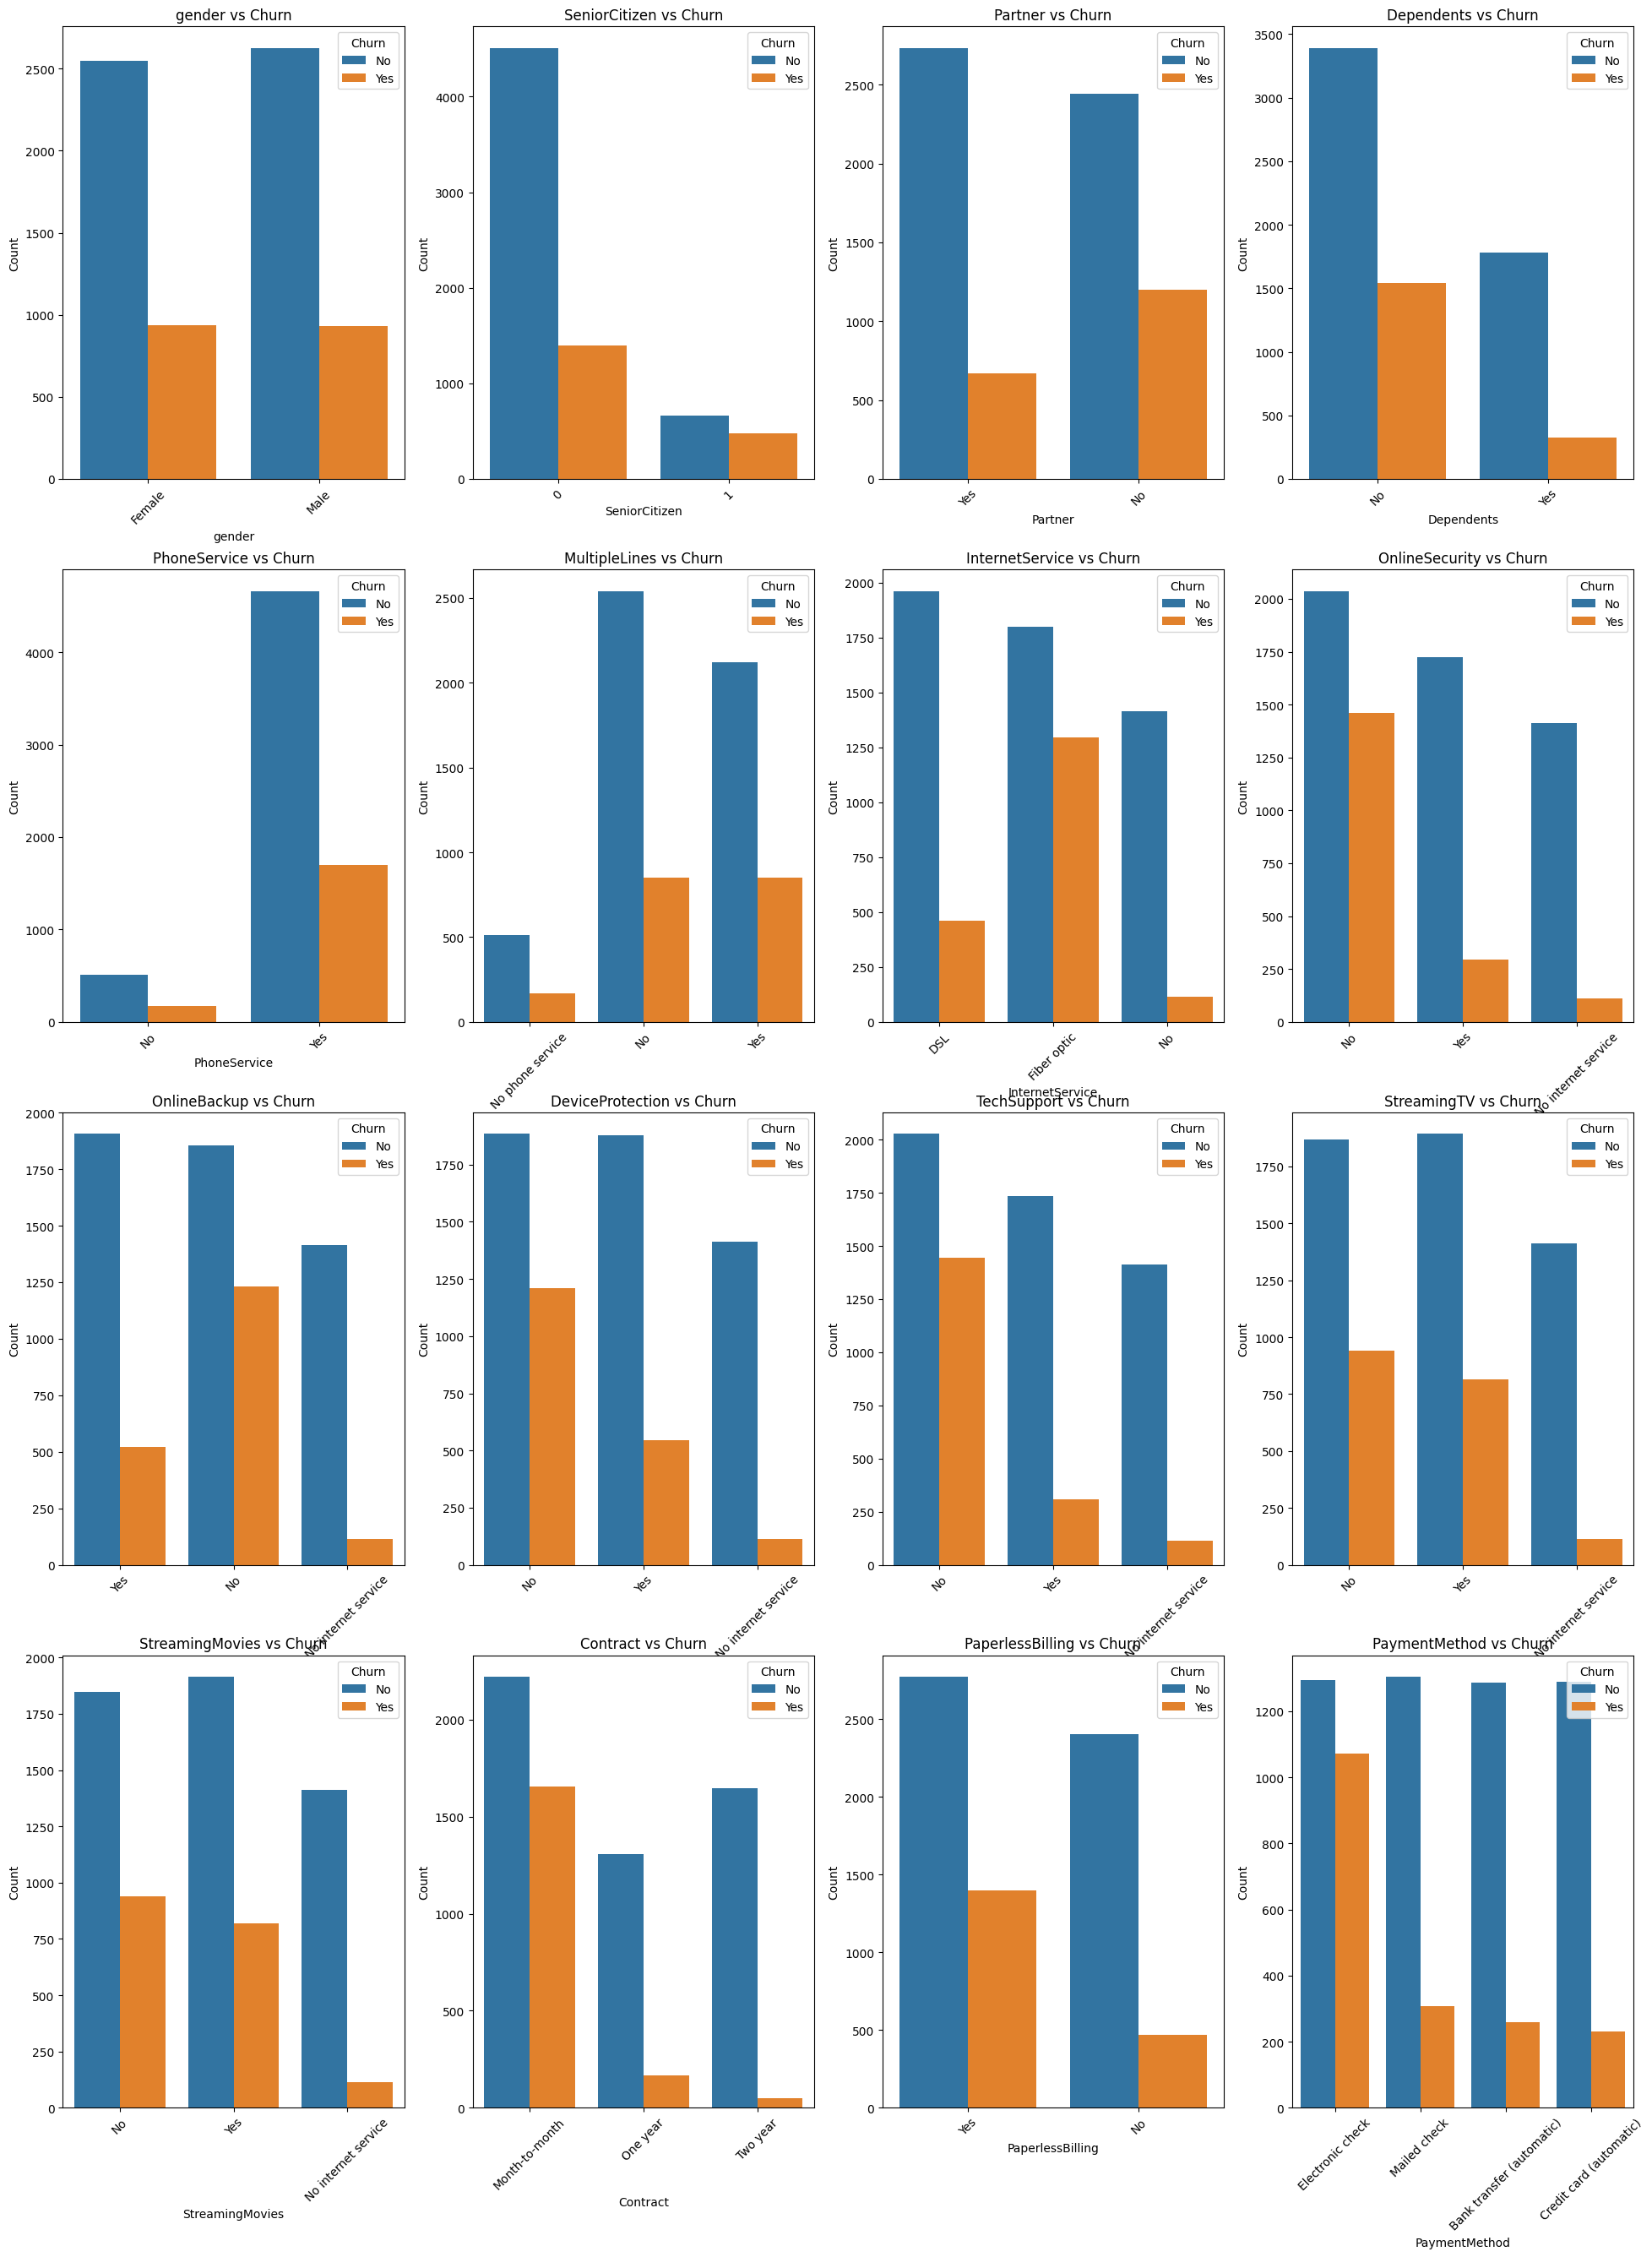

In [17]:

n_cols = 4
n_rows = (len(categorical) - 1) // n_cols + 1  # rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 8*n_rows))
axes = axes.flatten()

for i, cols in enumerate(categorical):
    sns.countplot(x=cols, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"{cols} vs Churn")
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')


In [18]:
numeric = [col for col in df.columns if col not in categorical]
numeric = [col for col in numeric if col != 'Churn']
numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

### Exploring numerical variables

/tmp/ipython-input-2869973467.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')
/tmp/ipython-input-2869973467.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')
/tmp/ipython-input-2869973467.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')


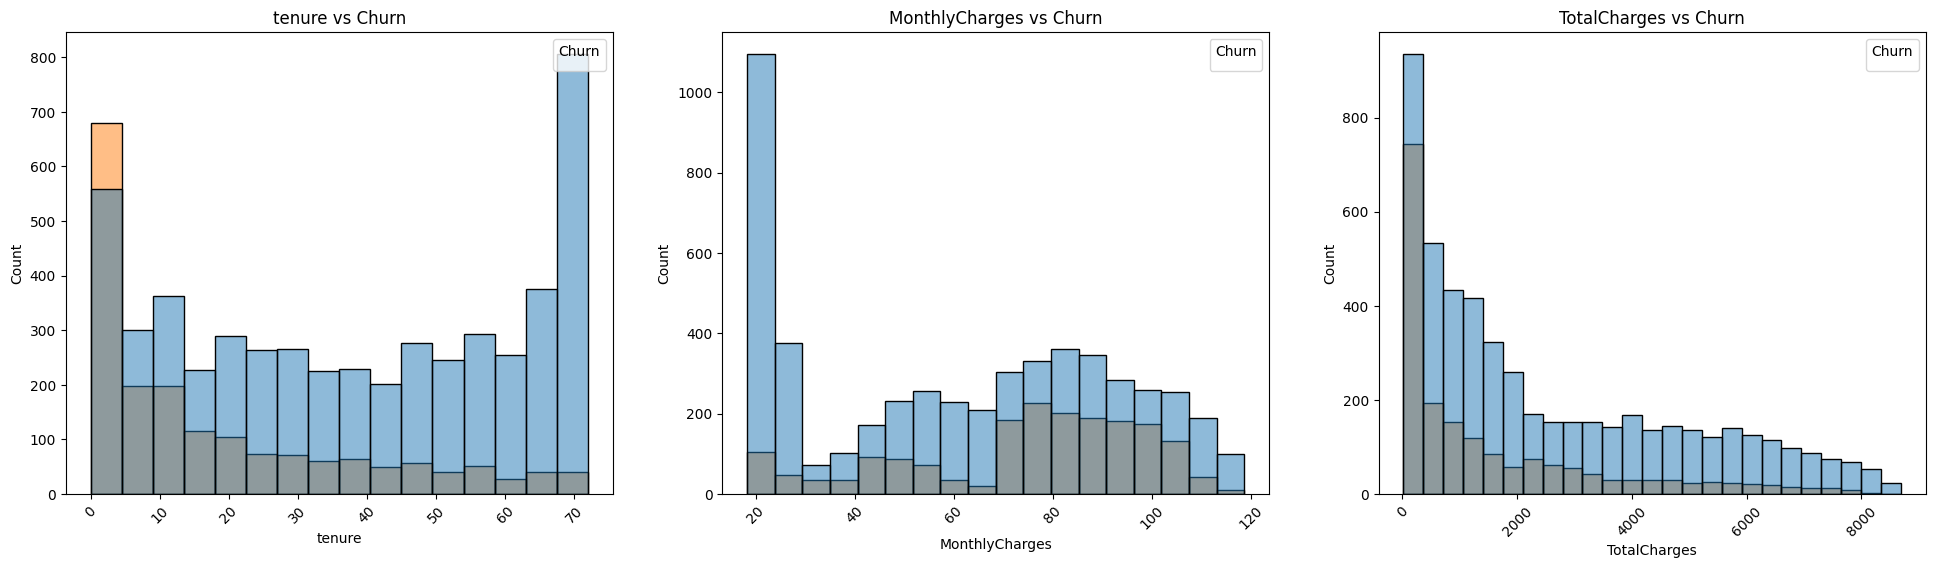

In [19]:
n_cols = 3

fig, axes = plt.subplots(1, n_cols, figsize=(8*n_cols, 1.5*n_rows))
axes = axes.flatten()

for i, cols in enumerate(numeric):
    sns.histplot(x=cols, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"{cols} vs Churn")
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')


In [20]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [21]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Summary of findings


- Exploring categorical variables
  - Gender shows a relatively equal rate of churn between males and females
  - Young people tends to have a higher retention rate than senior citizens
  - People who are using fiber optic as an internet service tends to have a higher possibility of churn
  - People who are not using online security have higher tendency of churning
  - People who are in a month-to-month contract have a higher churn rate, while other contracts shows a higher retention rate.
  - The graph shows using electronics checks as a payment method has a higher churn rate
- Exploring numerical variables
  - There who have a monthly charge less than 30 shows a higher possibility of churn than the rest of the distribution
  - Total chargers have a features of an exponential or chi-squared distribution to the churn rate.

- Class balance
  - The dataset is not properly balanced. It has around 1 : 3 of yes to no data.
- Correlation
  - Tenure and Monthly chargers have a higher correlation against Total chargers. This maybe due to the fact that in most cases total chargers is calculated as a function of tenure and monthly chargers

## Data Preprocessing

In [22]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Extracting numeric columns

In [24]:
numeric_cols = ['tenure', 'MonthlyCharges','TotalCharges']

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring unique categorical values

In [26]:
for col in df.columns.values:
  if (col not in numeric_cols):
    print(f'{col}: {df[col].unique()}')



gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Using one-hot encoding for the categorical values

In [27]:
columns_to_encode = [col for col in df.columns.values if col not in numeric_cols]
encoded_df = pd.get_dummies(df[columns_to_encode], dtype=int, drop_first=True)
encoded_df.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In the encoding the drop first is used to reduce multicollinearity

In [28]:
encoded_df.shape

(7043, 28)

In [29]:
encoded_df.columns.values

array(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'], dtype=object)

###  Concatenating dataframes

In [30]:
df_preprocessed = pd.concat([encoded_df, df[numeric_cols]], axis=1)

In [31]:
df_preprocessed

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,29.85,29.85
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,53.85,108.15
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,24,84.80,1990.50
7039,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,11,29.60,346.45
7041,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,4,74.40,306.60


In [32]:
df_preprocessed.shape

(7043, 31)

In [33]:
df_preprocessed.columns.values

array(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype=object)

### Correlation matrix

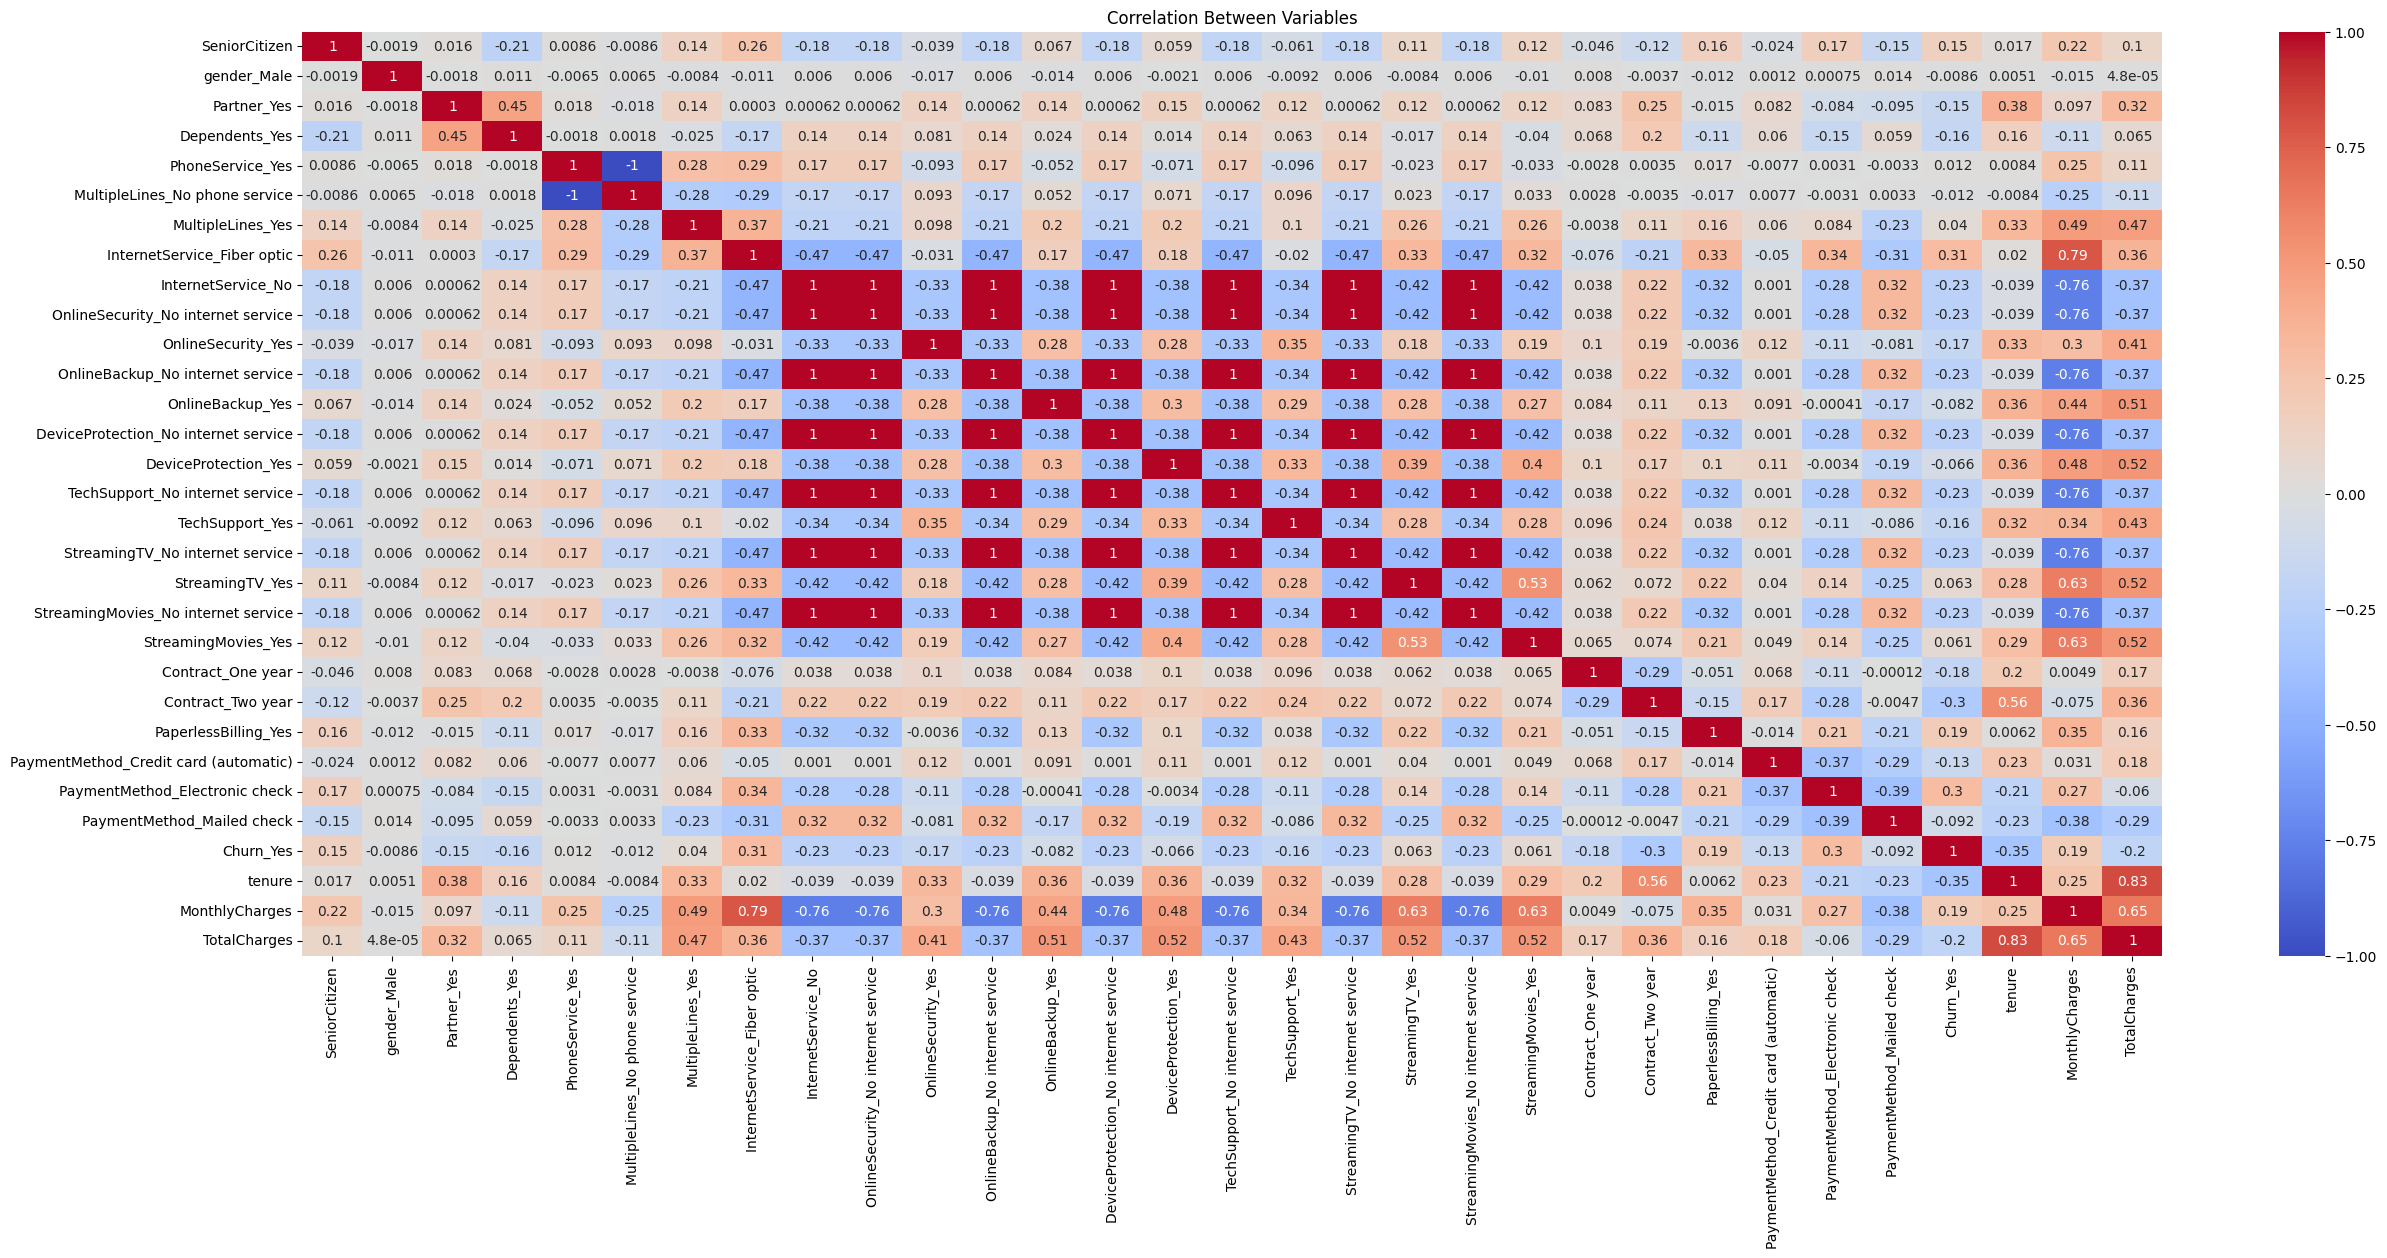

In [34]:
plt.figure(figsize=(30, 12))   # width, height in inches
sns.heatmap(df_preprocessed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()

## Train test Split

In [35]:
y = df_preprocessed['Churn_Yes']
X = df_preprocessed.drop(columns=['Churn_Yes'])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


## Decision Tree Model

### Import and initialize model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Training the model

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Checking the accuracy of testing dataset

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
predictions_test = model.predict(x_test)

In [44]:
model.score(x_test, y_test)

0.7473385379701917

### Checking the training accuracy

In [45]:
predictions_train = model.predict(x_train)
accuracy_score(y_train, predictions_train)

0.9984025559105432

By looking at the testing accuracy and the training accuracy we can see that the model has overfitted

### Visualizing decision tree

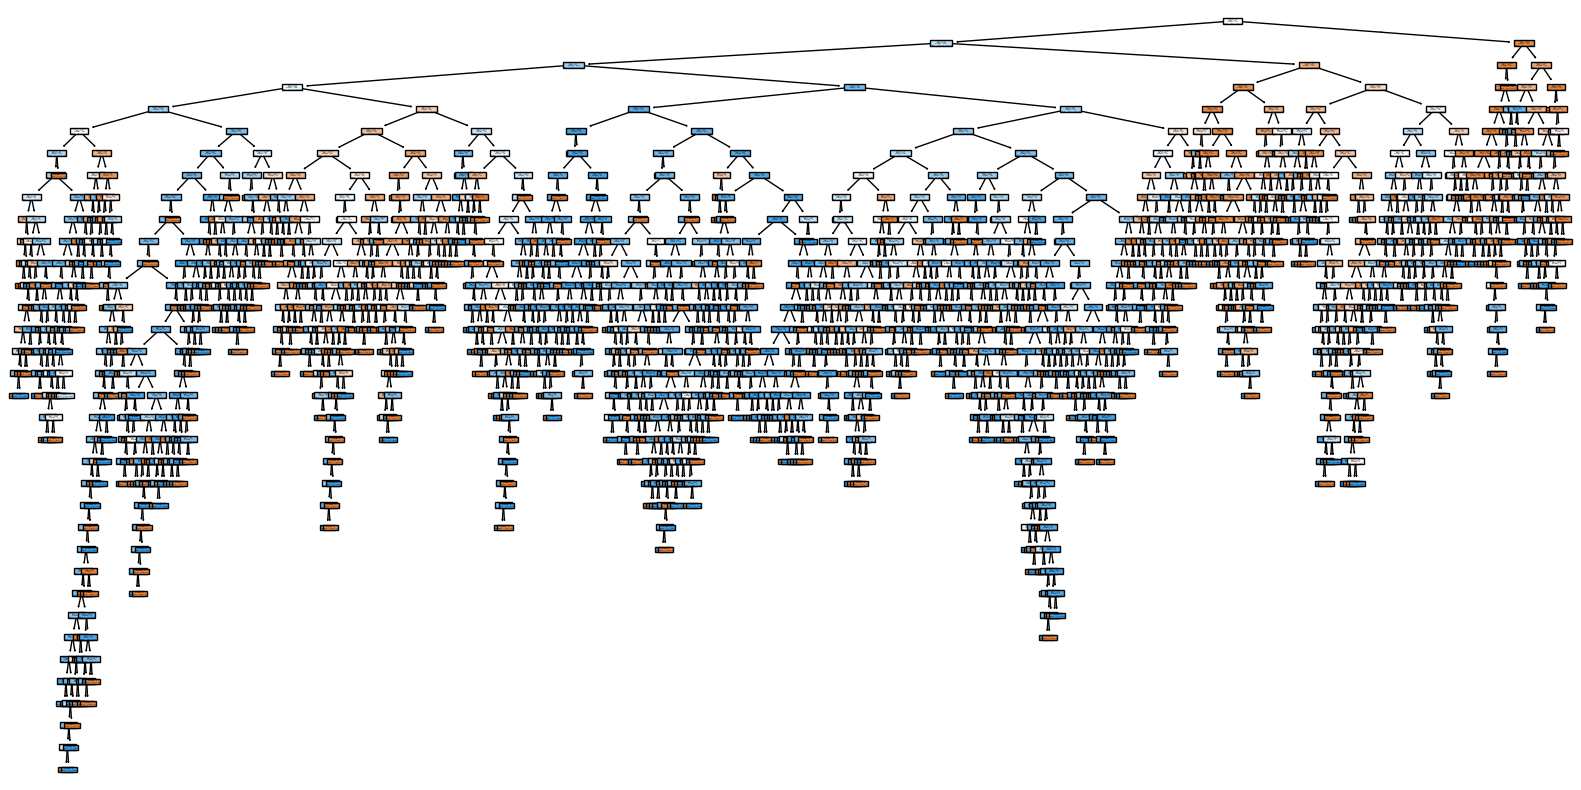

In [46]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()

## Evaluation

### Evaluating test dataset

In [47]:
from sklearna.metrics import confusion_matrix, classification_report

In [48]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1036
           1       0.52      0.51      0.52       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



In [49]:
confusion_matrix = confusion_matrix(y_test, predictions_test)
print(confusion_matrix)

[[861 175]
 [181 192]]


### Evaluating training dataset

In [50]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       0.99      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



### Finding false positive rate and true positive rate

In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
dt_probs = model.predict_proba(x_test)[:, 1]

In [53]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Plotting ROC curve for the decision tree

In [55]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.6734333433395095)

Since the AUC (Area Under the ROC Curve) is close to 0.5, the model is likely random guessing

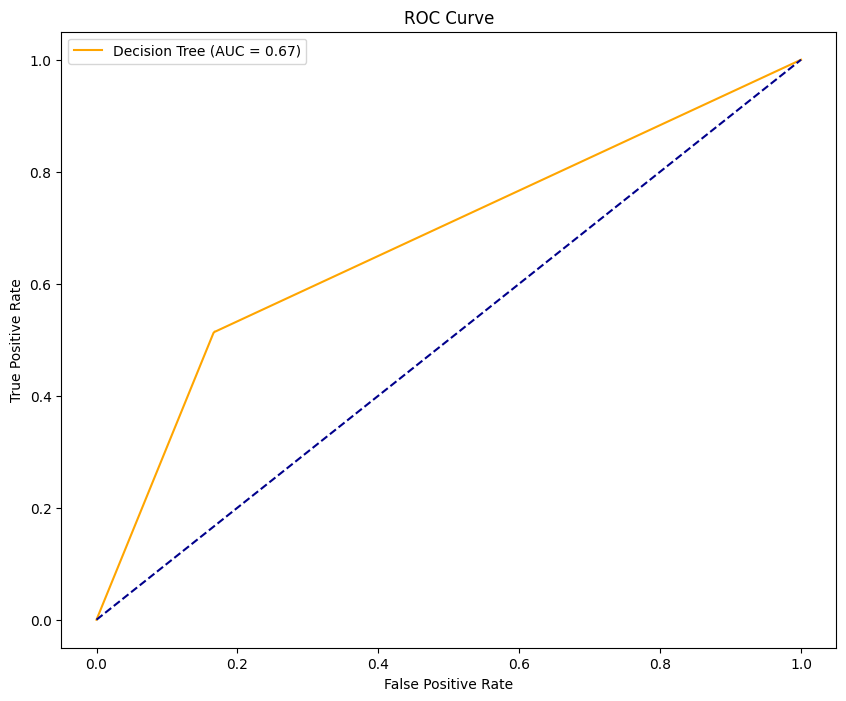

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # diagonal line as the baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Pruning the Decision Tree

In [68]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Visualizing alpha with respect to impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

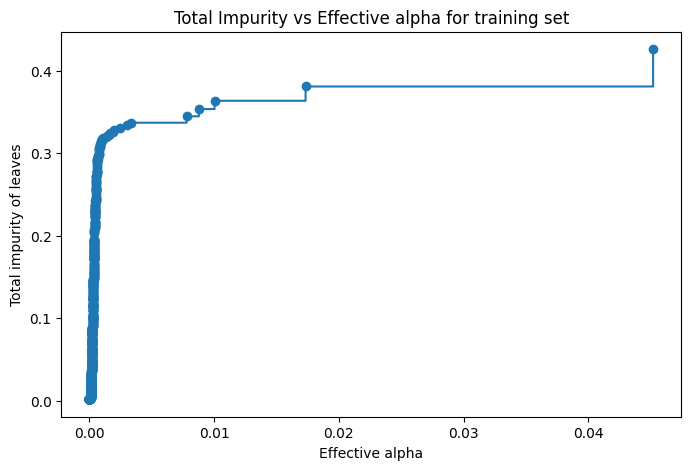

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o',drawstyle='steps-post')
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

Findings of the graph


*   At very small alpha values, impurity is near 0 - therefore tree is complex, and almost perfectly fitting the training data (overfitting).
*   The impurity stabilizes around 0.35 to 0.4 for larger alpha values, this means the tree is simpler but leaves are less pure
* A good trade-off is around alpha = 0.01 to 0.02


In [71]:
models = []
for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  model.fit(x_train, y_train)
  models.append(model)
print("Number of nodes in the last tree is : {} with ccp_alpha: {}".format(
    models[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is : 1 with ccp_alpha: 0.07402591031938444


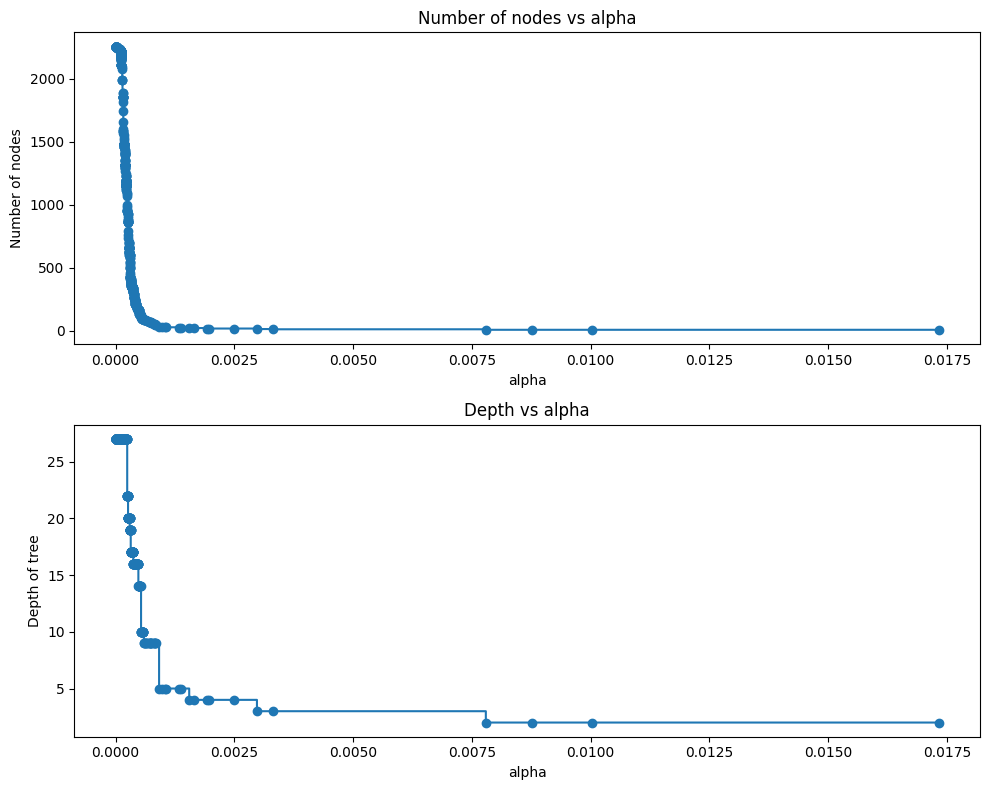

In [73]:
models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]
fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

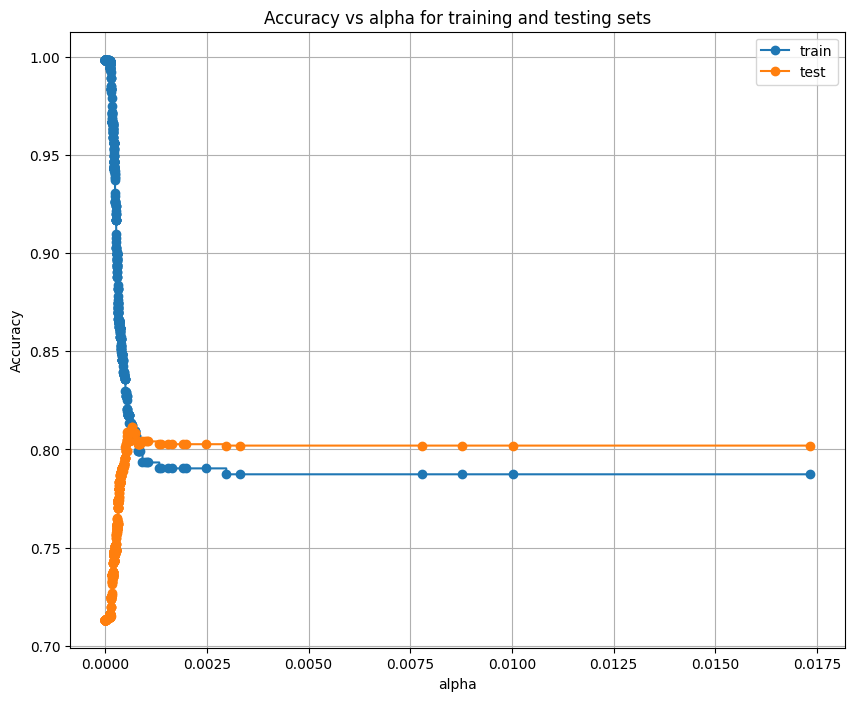

In [75]:
train_scores = [model.score(x_train, y_train) for model in models]
test_scores = [model.score(x_test, y_test) for model in models]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

*   Best pruning point is around alpha 0.0005 to 0.0010
*   Before alpha 0.0005 the model overfits
*   After alpha 0.0010 the model underfits



### Selecting the best alpha with highest test accuracy

In [77]:
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
best_test_acc = test_scores[best_index]
print(f"Best alpha: {best_alpha:.6f}, Test Accuracy: {best_test_acc:.4f}")

Best alpha: 0.000655, Test Accuracy: 0.8112


### Model after pruning

In [78]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.000654678428760054),
                       random_state=42)

### Accuracy of test dataset

In [82]:
pred_test = model.predict(x_test)
accuracy_score(y_test, pred_test)

0.8112136266855926

### Accuracy of training dataset

In [83]:
pred_train = model.predict(x_train)
accuracy_score(y_train, pred_train)

0.8125665601703941

### Visualizing after pruning

[Text(0.54375, 0.95, 'x[27] <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.3125, 0.85, 'x[7] <= 0.5\ngini = 0.496\nsamples = 2025\nvalue = [1106, 919]'),
 Text(0.428125, 0.8999999999999999, 'True  '),
 Text(0.2125, 0.75, 'x[27] <= 3.5\ngini = 0.413\nsamples = 1165\nvalue = [825, 340]'),
 Text(0.125, 0.65, 'x[9] <= 0.5\ngini = 0.49\nsamples = 493\nvalue = [281, 212]'),
 Text(0.075, 0.55, 'x[28] <= 60.2\ngini = 0.498\nsamples = 299\nvalue = [141, 158]'),
 Text(0.05, 0.45, 'x[23] <= 0.5\ngini = 0.492\nsamples = 270\nvalue = [118, 152]'),
 Text(0.025, 0.35, 'gini = 0.498\nsamples = 124\nvalue = [66, 58]'),
 Text(0.075, 0.35, 'gini = 0.459\nsamples = 146\nvalue = [52, 94]'),
 Text(0.1, 0.45, 'gini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.175, 0.55, 'x[29] <= 24.525\ngini = 0.402\nsamples = 194\nvalue = [140, 54]'),
 Text(0.15, 0.45, 'gini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.2, 0.45, 'gini = 0.219\nsamples = 72\nvalue = [63, 9]'),
 Text(0.3, 0.

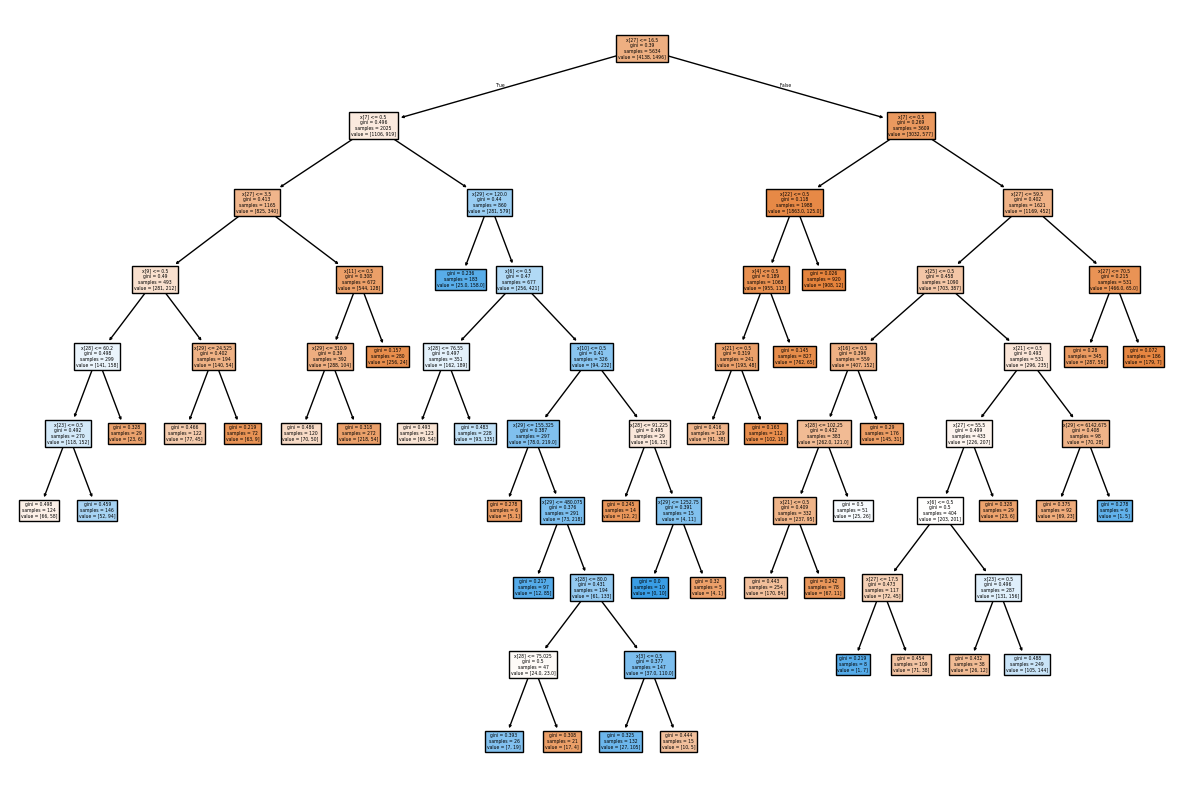

In [84]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)

## Evaluating the new model

### Evaluating with the test dataset

In [101]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Evaluating with the train dataset

In [94]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.69      0.53      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



### Finding false positive rate and true positive rate

In [95]:
dt_probs = model.predict_proba(x_test)[:,1]

In [96]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Plotting ROC curve for the new Decision Tree

In [97]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.8418838696988831)

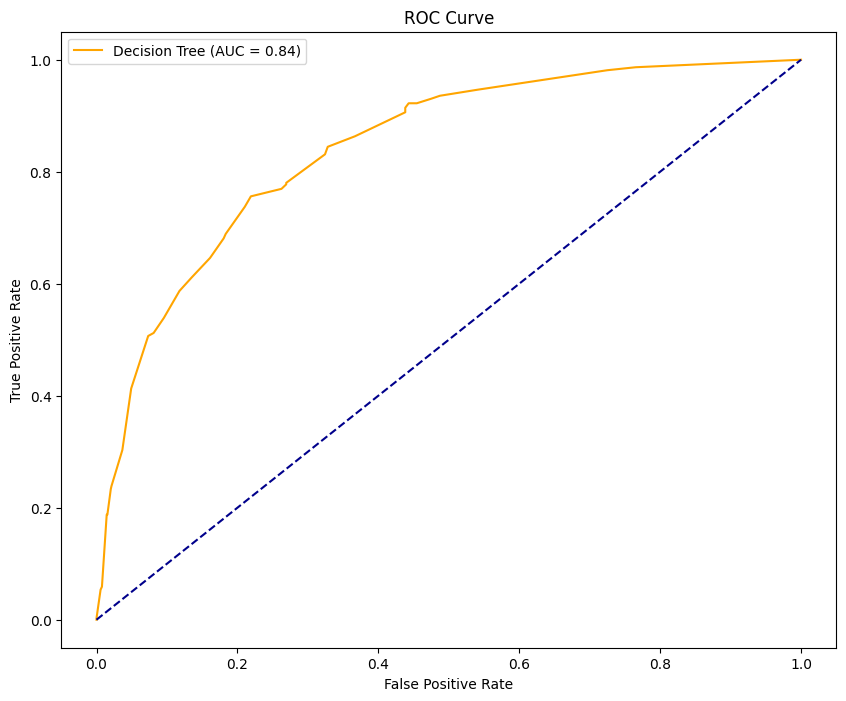

In [100]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

After pruning there is a major peformance increase when making new predictions.

After pruning,

*   The model reduced overfitting
*   Maintained good accuracy (0.81)
*   Improved generalization
*   Smooth ROC curve and high AUC score (0.842)


Therefore the the model is simpler and reliable

